### ITSM Ticket automation using RNN


1. NLP using LSTM to the Description of the problem
2. Run RNN for the attributes

In [10]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
data = pd.read_csv('/Users/jairomelo/Desktop/ML/YORK/ML1030/Capstone Project/incident 05-09-19.csv', encoding = "cp1252")

In [62]:
data.shape

(29239, 32)

### Actions:
1. Balance the data sample.
2. Description has null values; we will use short description in case of missing description, and filter any record where no description nor short description is provided
3. Removing any occurence where 

In [60]:
# replacing na values in description with the Short Description 
data["Description"].fillna(data["Short_Description"], inplace = True) 



In [61]:
data = data.dropna(subset = ['KCS_solution'])
data.head()

,Number,Description,Short_Description,Caller,Priority,Category,Sub_Category,Urgency,Impact,Configuration_item,...,Assignment_group,State.1,Resolution_category,Site,Resolved_by_group,Resolved_by,KCS_solution,CI_regions,Created,Resolved
0,INC000017612819,SIMS blank page when open with IE\r\n??IE ??S...,SIMS blank page,YUTONG ZHOU (152062324),Priority 4,Software,Website,Low,Limited,SIMS LATAM,...,GLOBAL SERVICE DESK,Closed Complete,Change Implementation,NaN,GLOBAL SERVICE DESK,JING HUANG (645010504),KB000010025934,LATAM,2017-11-12 21:03,2017-11-12 21:03
1,INC000020585404,"For dim_slt_id=203, dim_task_id=1658 exited wi...",TASK_STATUS - SLT ID 203,AGGRIFY SLT AUTOMATION (702303384),Priority 4,Application,Job Failure,Low,Limited,MENTOR BI SALES ANALYTICS,...,DATA AND ANALYTICS RR LTI,Closed Complete,Job Failure,NA US NJ RARITAN,DATA AND ANALYTICS RR LTI,DILIP KHANDAI (643026421),KB000010080602,NaN,2019-08-04 3:30,2019-08-06 6:39
2,INC000020692831,"For DIM_SLT_ID=203, following task(s) violated...",TASK_END_DELAY violated for DIM_SLT_ID 203,AGGRIFY SLT AUTOMATION (702303384),Priority 4,Application,Poor performance,Low,Limited,MENTOR BI SALES ANALYTICS,...,DATA AND ANALYTICS RR LTI,Draft,Job Failure,NA US NJ RARITAN,DATA AND ANALYTICS RR LTI,DILIP KHANDAI (643026421),KB000010081617,NaN,2019-08-24 2:15,2019-08-28 4:55
4,INC000017291067,> DS huddle Login issue,> DS huddle Login issue,SEAN FOLEY (702113126),Priority 4,Software,Desktop Software,Low,Localized,DS MOBILE,...,GLOBAL SERVICE DESK,Closed Complete,User Access / Permission,NA US NJ RARITAN,GLOBAL SERVICE DESK,ABEGAIL COMON (645001723),KB000010027981,NaN,2017-08-31 10:34,2017-08-31 14:36
6,INC000019116968,When did this issue begin?:2018-09-28\n\nWho i...,not correct data on report. This is follow up ...,THI PHUONG THAO TRAN (152047182),Priority 3,Application,Data Issue,High,Limited,IDISCOVER-OSEA-PROD,...,DATA AND ANALYTICS RR TCS,Closed Complete,Data Issue,ASPAC VN HO CHI MINH CITY,DATA AND ANALYTICS RR TCS,SUREKHA A (643011713),KB000010044712,ASPAC,2018-09-30 22:39,2018-10-03 9:42


In [35]:
data.shape

(29239, 35)

In [14]:
data.KCS_solution.value_counts()

KB000010048673    1024
KB000010081174     798
KB000010036182     573
KB000010050747     527
KB000010046825     473
KB000010043597     439
KB000010025911     410
KB000010078359     359
KB000010049766     339
KB000010041363     278
KB000010032380     262
KB000010052516     227
KB000010057276     219
KB000010026638     172
KB000010081617     160
KB000010049545     159
KB000010057501     135
KB000010079000     128
KB000010045971     117
KB000010028903     115
KB000010049422     112
KB000010079222     111
KB000010079700     107
KB000010048910     105
KB000010052515     105
KB000010032297     103
KB000010024976     102
KB000010033441      96
KB000010058918      95
KB000010026470      95
                  ... 
KB000010061149       1
KB000010050548       1
KB000010028142       1
KB000010080661       1
KB000010070995       1
KB000010066696       1
KB000010068197       1
KB000010075708       1
KB000010045533       1
KB000010041362       1
KB000010051184       1
KB000010037728       1
KB000010080

In [15]:
data['target_KCS'] = data.KCS_solution.astype('category').cat.codes

In [16]:
labels = data.KCS_solution.astype('category').cat.categories

In [17]:
df = pd.DataFrame(labels) 
df.to_csv ('/Users/jairomelo/Desktop/ML/YORK/ML1030/Capstone Project/labels_KCS.csv')


In [18]:
data.head()

,Number,Description,Short_Description,Caller,Priority,Category,Sub_Category,Urgency,Impact,Configuration_item,...,State.1,Resolution_category,Site,Resolved_by_group,Resolved_by,KCS_solution,CI_regions,Created,Resolved,target_KCS
0,INC000017612819,SIMS blank page when open with IE\r\n??IE ??S...,SIMS blank page,YUTONG ZHOU (152062324),Priority 4,Software,Website,Low,Limited,SIMS LATAM,...,Closed Complete,Change Implementation,NaN,GLOBAL SERVICE DESK,JING HUANG (645010504),KB000010025934,LATAM,2017-11-12 21:03,2017-11-12 21:03,134
1,INC000020585404,"For dim_slt_id=203, dim_task_id=1658 exited wi...",TASK_STATUS - SLT ID 203,AGGRIFY SLT AUTOMATION (702303384),Priority 4,Application,Job Failure,Low,Limited,MENTOR BI SALES ANALYTICS,...,Closed Complete,Job Failure,NA US NJ RARITAN,DATA AND ANALYTICS RR LTI,DILIP KHANDAI (643026421),KB000010080602,NaN,2019-08-04 3:30,2019-08-06 6:39,6569
2,INC000020692831,"For DIM_SLT_ID=203, following task(s) violated...",TASK_END_DELAY violated for DIM_SLT_ID 203,AGGRIFY SLT AUTOMATION (702303384),Priority 4,Application,Poor performance,Low,Limited,MENTOR BI SALES ANALYTICS,...,Draft,Job Failure,NA US NJ RARITAN,DATA AND ANALYTICS RR LTI,DILIP KHANDAI (643026421),KB000010081617,NaN,2019-08-24 2:15,2019-08-28 4:55,6662
4,INC000017291067,> DS huddle Login issue,> DS huddle Login issue,SEAN FOLEY (702113126),Priority 4,Software,Desktop Software,Low,Localized,DS MOBILE,...,Closed Complete,User Access / Permission,NA US NJ RARITAN,GLOBAL SERVICE DESK,ABEGAIL COMON (645001723),KB000010027981,NaN,2017-08-31 10:34,2017-08-31 14:36,233
6,INC000019116968,When did this issue begin?:2018-09-28\n\nWho i...,not correct data on report. This is follow up ...,THI PHUONG THAO TRAN (152047182),Priority 3,Application,Data Issue,High,Limited,IDISCOVER-OSEA-PROD,...,Closed Complete,Data Issue,ASPAC VN HO CHI MINH CITY,DATA AND ANALYTICS RR TCS,SUREKHA A (643011713),KB000010044712,ASPAC,2018-09-30 22:39,2018-10-03 9:42,1269


In [19]:
data['num_words'] = data['Description'].apply(lambda x : len(x.split()))

In [20]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,10,30,70,135, np.inf], labels=['0-10', '10-30', '30-70','70-135' ,'>135'])


In [21]:
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [22]:
word_distribution.head()

,bins,counts
0,0-10,6443
1,10-30,5191
2,30-70,5325
3,70-135,3330
4,>135,8950


Text(0.5, 1.0, 'Word distribution per bin')

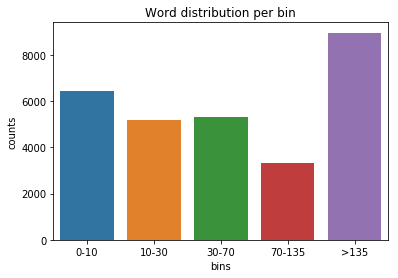

In [23]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [36]:
data.head()

,Number,Description,Short_Description,Caller,Priority,Category,Sub_Category,Urgency,Impact,Configuration_item,...,Site,Resolved_by_group,Resolved_by,KCS_solution,CI_regions,Created,Resolved,target_KCS,num_words,bins
0,INC000017612819,SIMS blank page when open with IE\r\n??IE ??S...,SIMS blank page,YUTONG ZHOU (152062324),Priority 4,Software,Website,Low,Limited,SIMS LATAM,...,NaN,GLOBAL SERVICE DESK,JING HUANG (645010504),KB000010025934,LATAM,2017-11-12 21:03,2017-11-12 21:03,134,10,0-10
1,INC000020585404,"For dim_slt_id=203, dim_task_id=1658 exited wi...",TASK_STATUS - SLT ID 203,AGGRIFY SLT AUTOMATION (702303384),Priority 4,Application,Job Failure,Low,Limited,MENTOR BI SALES ANALYTICS,...,NA US NJ RARITAN,DATA AND ANALYTICS RR LTI,DILIP KHANDAI (643026421),KB000010080602,NaN,2019-08-04 3:30,2019-08-06 6:39,6569,8,0-10
2,INC000020692831,"For DIM_SLT_ID=203, following task(s) violated...",TASK_END_DELAY violated for DIM_SLT_ID 203,AGGRIFY SLT AUTOMATION (702303384),Priority 4,Application,Poor performance,Low,Limited,MENTOR BI SALES ANALYTICS,...,NA US NJ RARITAN,DATA AND ANALYTICS RR LTI,DILIP KHANDAI (643026421),KB000010081617,NaN,2019-08-24 2:15,2019-08-28 4:55,6662,20,10-30
4,INC000017291067,> DS huddle Login issue,> DS huddle Login issue,SEAN FOLEY (702113126),Priority 4,Software,Desktop Software,Low,Localized,DS MOBILE,...,NA US NJ RARITAN,GLOBAL SERVICE DESK,ABEGAIL COMON (645001723),KB000010027981,NaN,2017-08-31 10:34,2017-08-31 14:36,233,5,0-10
6,INC000019116968,When did this issue begin?:2018-09-28\n\nWho i...,not correct data on report. This is follow up ...,THI PHUONG THAO TRAN (152047182),Priority 3,Application,Data Issue,High,Limited,IDISCOVER-OSEA-PROD,...,ASPAC VN HO CHI MINH CITY,DATA AND ANALYTICS RR TCS,SUREKHA A (643011713),KB000010044712,ASPAC,2018-09-30 22:39,2018-10-03 9:42,1269,77,70-135


In [24]:
num_class_KCS = len(np.unique(data.KCS_solution.values))
y_KCS = data['target_KCS'].values

## Topic Modelling

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import pandas as pd
import re
import warnings
from sklearn.metrics import confusion_matrix
#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

In [26]:
data['Description'] = data['Description'].astype(str)

In [27]:
type(data['Description'])

pandas.core.series.Series

In [28]:
data_description = data.Description.values

In [29]:
type(data_description)

numpy.ndarray

In [30]:
#cv = # Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1, min_df=1, max_features=None)

# convert text data into term-frequency matrix
data_description = count_vec.fit_transform(data_description)




tfidf_transformer = TfidfTransformer()

# convert term-frequency matrix into tf-idf
tfidf_matrix = tfidf_transformer.fit_transform(data_description)

# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(count_vec.get_feature_names(), tfidf_transformer.idf_))

for word, score in word2tfidf.items():
    print(word, score)

0000 10.59014573330377
00000 10.59014573330377
000000000000080001 10.59014573330377
000000000000080002 10.59014573330377
000000000000080003 10.59014573330377
000000000000080004 10.59014573330377
000000000000080005 10.59014573330377
000000000000080006 10.59014573330377
000000000000080007 10.59014573330377
000000000000080008 10.59014573330377
000000000000080009 10.59014573330377
000000000000080010 10.59014573330377
000000000000080011 10.59014573330377
000000000000080015 10.59014573330377
000000000000080018 10.59014573330377
000000000000080019 10.59014573330377
000000000000080020 10.59014573330377
000000000000080021 10.59014573330377
000000000000080022 10.59014573330377
000000000000080023 10.59014573330377
000000000000080024 10.59014573330377
000000000000080025 10.59014573330377
000000000000080026 10.59014573330377
000000000000080027 10.59014573330377
000000000000080028 10.59014573330377
000000000000080029 10.59014573330377
000000000000080030 10.59014573330377
000000000000080033 10.590145

0761r 10.59014573330377
0761v 10.59014573330377
0761w 10.59014573330377
076aa 10.59014573330377
077gj 10.59014573330377
077ys 10.59014573330377
078 10.59014573330377
0788c 10.59014573330377
078oe 10.59014573330377
078v6 10.59014573330377
0793v 10.59014573330377
0793w 10.59014573330377
0793x 10.59014573330377
0793y 10.59014573330377
0793z 10.59014573330377
07ae4 10.59014573330377
07aof 10.59014573330377
07ban 10.59014573330377
07bcu 10.59014573330377
07bdc 10.59014573330377
07bdg 10.59014573330377
07be1 10.59014573330377
07bem 10.59014573330377
07bff 10.59014573330377
07bfh 10.59014573330377
07bfn 10.59014573330377
07bgs 10.59014573330377
07bib 10.59014573330377
07bx2 10.59014573330377
07bx3 10.59014573330377
07cto 10.59014573330377
07ctr 10.59014573330377
07d6s 10.59014573330377
07dgb 10.59014573330377
07dgd 10.59014573330377
07dgf 10.59014573330377
07dgi 10.59014573330377
07dgj 10.59014573330377
07dgk 10.59014573330377
07dp6 10.59014573330377
07egl 10.59014573330377
07ehl 10.590145733

0g1t0 10.59014573330377
0g1t2 10.59014573330377
0g1tf 10.59014573330377
0g1tn 10.59014573330377
0g1u3 10.59014573330377
0g1uh 10.59014573330377
0g1ux 10.59014573330377
0g1vh 10.59014573330377
0g34i 10.59014573330377
0g34y 10.59014573330377
0g4aq 10.59014573330377
0g4bq 10.59014573330377
0g4cb 10.59014573330377
0g4d6 10.59014573330377
0g4dd 10.59014573330377
0g4ds 10.59014573330377
0g4dw 10.59014573330377
0g4dz 10.59014573330377
0g4e9 10.59014573330377
0g4eb 10.59014573330377
0g4fd 10.59014573330377
0g5en 10.59014573330377
0g9eg 10.59014573330377
0g9x9 10.59014573330377
0g9xc 10.59014573330377
0gbc3 10.59014573330377
0gbdn 10.59014573330377
0gciy 10.59014573330377
0gcl2 10.59014573330377
0gclh 10.59014573330377
0gclk 10.59014573330377
0gcm2 10.59014573330377
0gcmd 10.59014573330377
0gcmf 10.59014573330377
0gcmp 10.59014573330377
0gcmr 10.59014573330377
0gcmy 10.59014573330377
0gcmz 10.59014573330377
0gcn3 10.59014573330377
0gcn6 10.59014573330377
0gcng 10.59014573330377
0gcni 10.5901457

0wluh 10.59014573330377
0wm6d 10.59014573330377
0wm6f 10.59014573330377
0wm6h 10.59014573330377
0wmbw 10.59014573330377
0wmdj 10.59014573330377
0wn4e 10.59014573330377
0wn55 10.59014573330377
0wn57 10.59014573330377
0wn5z 10.59014573330377
0wn77 10.59014573330377
0woah 10.59014573330377
0wq1k 10.59014573330377
0wq2i 10.59014573330377
0wq8k 10.59014573330377
0wq8s 10.59014573330377
0wq8u 10.59014573330377
0wq8v 10.59014573330377
0wq8w 10.59014573330377
0wq8x 10.59014573330377
0wq8y 10.59014573330377
0wq8z 10.59014573330377
0wr0e 10.59014573330377
0wr0g 10.59014573330377
0wr0i 10.59014573330377
0wrzv 10.59014573330377
0ws0d 10.59014573330377
0ws23 10.59014573330377
0wt1u 10.59014573330377
0wt1z 10.59014573330377
0wt24 10.59014573330377
0wt4h 10.59014573330377
0wt4k 10.59014573330377
0wt4o 10.59014573330377
0wtee 10.59014573330377
0wtem 10.59014573330377
0wteo 10.59014573330377
0wv95 10.59014573330377
0wvat 10.59014573330377
0wvb4 10.59014573330377
0wvl0 10.59014573330377
0wvlz 10.5901457

152065980 10.59014573330377
152066630 10.59014573330377
152068742 10.59014573330377
152070385 10.59014573330377
152071585 10.59014573330377
152071736 10.59014573330377
152217727 10.59014573330377
152312120 10.59014573330377
152312127 10.59014573330377
152312142 10.59014573330377
152312150 10.59014573330377
152312165 10.59014573330377
152312988 10.59014573330377
152312990 10.59014573330377
152312998 10.59014573330377
152313004 10.59014573330377
152313703 10.59014573330377
152313744 10.59014573330377
152313988 10.59014573330377
1524814527 10.59014573330377
152806567 10.59014573330377
152808614 10.59014573330377
152809209 10.59014573330377
152809329 10.59014573330377
152813599 10.59014573330377
152813965 10.59014573330377
152814213 10.59014573330377
152815165 10.59014573330377
152815166 10.59014573330377
152817267 10.59014573330377
152817559 10.59014573330377
152818812 10.59014573330377
152819523 10.59014573330377
152820662 10.59014573330377
152821013 10.59014573330377
152821249 10.590145

1ilac 10.59014573330377
1ilcb 10.59014573330377
1im6w 10.59014573330377
1imch 10.59014573330377
1inly 10.59014573330377
1innk 10.59014573330377
1innt 10.59014573330377
1inu3 10.59014573330377
1inv6 10.59014573330377
1invs 10.59014573330377
1inx1 10.59014573330377
1iog1 10.59014573330377
1ionf 10.59014573330377
1ip9a 10.59014573330377
1ipr2 10.59014573330377
1ipr4 10.59014573330377
1ipst 10.59014573330377
1ipu7 10.59014573330377
1iq88 10.59014573330377
1iqb8 10.59014573330377
1ir1x 10.59014573330377
1ir3b 10.59014573330377
1ir9i 10.59014573330377
1irdc 10.59014573330377
1irm9 10.59014573330377
1irma 10.59014573330377
1itki 10.59014573330377
1iu10 10.59014573330377
1iu11 10.59014573330377
1iwef 10.59014573330377
1iwvj 10.59014573330377
1iwvk 10.59014573330377
1izqw 10.59014573330377
1izue 10.59014573330377
1izwd 10.59014573330377
1j06m 10.59014573330377
1j0d9 10.59014573330377
1j0rc 10.59014573330377
1j0rh 10.59014573330377
1j0rp 10.59014573330377
1j20w 10.59014573330377
1j21p 10.5901457

20181204230532 10.59014573330377
20181204233343 10.59014573330377
20181204233617 10.59014573330377
20181204233844 10.59014573330377
20181204234232 10.59014573330377
20181205000400 10.59014573330377
20181205011503 10.59014573330377
20181205011511 10.59014573330377
20181205014256 10.59014573330377
20181205023008 10.59014573330377
20181205024509 10.59014573330377
20181205024510 10.59014573330377
20181205034649 10.59014573330377
20181205034708 10.59014573330377
20181205035513 10.59014573330377
20181205035629 10.59014573330377
20181205035755 10.59014573330377
20181205040005 10.59014573330377
20181205040114 10.59014573330377
20181205040203 10.59014573330377
20181205040209 10.59014573330377
20181205040223 10.59014573330377
20181205040358 10.59014573330377
20181205041751 10.59014573330377
20181205043101 10.59014573330377
20181205044628 10.59014573330377
20181205044634 10.59014573330377
20181205055157 10.59014573330377
20181205061834 10.59014573330377
20181205063105 10.59014573330377
2018120506

20190217180019 10.59014573330377
20190217180022 10.59014573330377
20190217180408 10.59014573330377
20190217180607 10.59014573330377
20190217180724 10.59014573330377
20190217181006 10.59014573330377
20190217211450 10.59014573330377
20190218000247 10.59014573330377
20190218011735 10.59014573330377
20190218012702 10.59014573330377
20190218020045 10.59014573330377
20190218024133 10.59014573330377
20190218024427 10.59014573330377
20190218033616 10.59014573330377
20190218050018 10.59014573330377
20190218051431 10.59014573330377
20190218051945 10.59014573330377
20190218052052 10.59014573330377
20190218054005 10.59014573330377
20190218054839 10.59014573330377
20190218060328 10.59014573330377
20190218060701 10.59014573330377
20190218061001 10.59014573330377
20190218061108 10.59014573330377
20190218061216 10.59014573330377
20190218062411 10.59014573330377
20190218070117 10.59014573330377
20190218080018 10.59014573330377
20190218081622 10.59014573330377
20190218082041 10.59014573330377
2019021808

20190403102821 10.59014573330377
20190403104332 10.59014573330377
20190403111005 10.59014573330377
20190403123726 10.59014573330377
20190403192144 10.59014573330377
20190403195524 10.59014573330377
20190403202905 10.59014573330377
20190403214021 10.59014573330377
20190403230140 10.59014573330377
20190403232648 10.59014573330377
20190403235200 10.59014573330377
20190404000310 10.59014573330377
20190404000332 10.59014573330377
20190404003209 10.59014573330377
20190404010012 10.59014573330377
20190404010810 10.59014573330377
20190404013917 10.59014573330377
20190404014016 10.59014573330377
20190404014100 10.59014573330377
20190404021528 10.59014573330377
20190404022317 10.59014573330377
20190404023007 10.59014573330377
20190404023542 10.59014573330377
20190404023555 10.59014573330377
20190404031805 10.59014573330377
20190404032049 10.59014573330377
20190404035153 10.59014573330377
20190404035209 10.59014573330377
20190404042702 10.59014573330377
20190404042715 10.59014573330377
2019040404

20190529070517 10.59014573330377
20190529070613 10.59014573330377
20190529093111 10.59014573330377
20190529094015 10.59014573330377
20190529100539 10.59014573330377
20190529105601 10.59014573330377
20190529105941 10.59014573330377
20190529112601 10.59014573330377
20190529120012 10.59014573330377
20190529132812 10.59014573330377
20190529140029 10.59014573330377
20190529150558 10.59014573330377
20190529150711 10.59014573330377
20190529151102 10.59014573330377
20190529152025 10.59014573330377
20190529152210 10.59014573330377
20190529161451 10.59014573330377
20190529162100 10.59014573330377
20190529162506 10.59014573330377
20190529171055 10.59014573330377
20190529172442 10.59014573330377
20190529180000 10.59014573330377
20190529180945 10.59014573330377
20190529183552 10.59014573330377
20190529191103 10.59014573330377
20190529195236 10.59014573330377
20190529200223 10.59014573330377
20190529201815 10.59014573330377
20190529213219 10.59014573330377
20190529213239 10.59014573330377
2019052921

20190802230505 10.59014573330377
20190802235801 10.59014573330377
20190803000817 10.59014573330377
20190803001545 10.59014573330377
20190803001646 10.59014573330377
20190803002540 10.59014573330377
20190803003958 10.59014573330377
20190803004131 10.59014573330377
20190803011049 10.59014573330377
20190803011743 10.59014573330377
20190803011749 10.59014573330377
20190803011816 10.59014573330377
20190803013257 10.59014573330377
20190803015049 10.59014573330377
20190803025039 10.59014573330377
20190803030515 10.59014573330377
20190803060400 10.59014573330377
20190803065810 10.59014573330377
20190803075601 10.59014573330377
20190803110106 10.59014573330377
20190803134943 10.59014573330377
20190803143916 10.59014573330377
20190803180127 10.59014573330377
20190803203006 10.59014573330377
20190804000216 10.59014573330377
20190804001745 10.59014573330377
20190804002236 10.59014573330377
20190804003100 10.59014573330377
20190804003624 10.59014573330377
20190804010125806 10.59014573330377
2019080

29xo4 10.59014573330377
29xoo 10.59014573330377
29xzp 10.59014573330377
29yc4 10.59014573330377
29yds 10.59014573330377
29ylm 10.59014573330377
29zwz 10.59014573330377
2_dailysalesformgr 10.59014573330377
2a02 10.59014573330377
2a1c7182 10.59014573330377
2a1rd 10.59014573330377
2a2il 10.59014573330377
2a2iq 10.59014573330377
2a2is 10.59014573330377
2a2j2 10.59014573330377
2a348582a465428bb595e18fbba6ab18_dcr3cormvke_dsa_pstg_emea 10.59014573330377
2a4g5 10.59014573330377
2a4qh 10.59014573330377
2a513 10.59014573330377
2a60j 10.59014573330377
2a60t 10.59014573330377
2a6a8 10.59014573330377
2a6nq 10.59014573330377
2a6ns 10.59014573330377
2a6nv 10.59014573330377
2a6w7 10.59014573330377
2a835 10.59014573330377
2a8tk 10.59014573330377
2a8vd 10.59014573330377
2a93x 10.59014573330377
2a93y 10.59014573330377
2a990 10.59014573330377
2aasu 10.59014573330377
2aasv 10.59014573330377
2aasw 10.59014573330377
2aasx 10.59014573330377
2aasy 10.59014573330377
2ac4641415fd 10.59014573330377
2acm6 10.5901

3606177899 10.59014573330377
3606178657 10.59014573330377
3606179090 10.59014573330377
3606179273 10.59014573330377
3606181835 10.59014573330377
3606181938 10.59014573330377
3606191964 10.59014573330377
3606195395 10.59014573330377
3606195465 10.59014573330377
3606196108 10.59014573330377
3606198257 10.59014573330377
3606201710 10.59014573330377
3606201763 10.59014573330377
3606203767 10.59014573330377
3606207550 10.59014573330377
3606214158 10.59014573330377
3606214614 10.59014573330377
3606225985 10.59014573330377
3606227938 10.59014573330377
3606228191 10.59014573330377
3606229570 10.59014573330377
3606259780 10.59014573330377
3609196 10.59014573330377
362 10.59014573330377
3621 10.59014573330377
362311 10.59014573330377
3629550 10.59014573330377
3632 10.59014573330377
363929 10.59014573330377
364190 10.59014573330377
3646228426 10.59014573330377
3646228427 10.59014573330377
3646228862 10.59014573330377
3646230683 10.59014573330377
3646237397 10.59014573330377
3646237725 10.59014573

611450 10.59014573330377
6116 10.59014573330377
611632025 10.59014573330377
612 10.59014573330377
612264547889856266 10.59014573330377
6144 10.59014573330377
6147409 10.59014573330377
614k 10.59014573330377
616 10.59014573330377
6165 10.59014573330377
616742 10.59014573330377
616743 10.59014573330377
6187909 10.59014573330377
6188 10.59014573330377
61956 10.59014573330377
61957 10.59014573330377
61959 10.59014573330377
61960 10.59014573330377
619739 10.59014573330377
61977 10.59014573330377
619mm 10.59014573330377
61b1f82614e7 10.59014573330377
620 10.59014573330377
62007046 10.59014573330377
620080001 10.59014573330377
620080002 10.59014573330377
620080003 10.59014573330377
620566 10.59014573330377
6210195060 10.59014573330377
6210196197 10.59014573330377
6210196381 10.59014573330377
6210197793 10.59014573330377
6210198197 10.59014573330377
6210200083 10.59014573330377
6212 10.59014573330377
6215 10.59014573330377
622 10.59014573330377
622486495 10.59014573330377
6231 10.5901457333037

asyncclose 10.59014573330377
asynccontrolleractioninvoker 10.59014573330377
asynchrunspecification_request 10.59014573330377
asynchwait_request 10.59014573330377
asyncinvocationwithfilters 10.59014573330377
asyncresult 10.59014573330377
asyncresultwrapper 10.59014573330377
asyncsqlrecordwriter 10.59014573330377
asyncwrite 10.59014573330377
aszure 10.59014573330377
así 10.59014573330377
atached 10.59014573330377
atas 10.59014573330377
atb 10.59014573330377
atchara 10.59014573330377
atclas 10.59014573330377
atender 10.59014573330377
athena 10.59014573330377
athens 10.59014573330377
athentication 10.59014573330377
athira 10.59014573330377
ativar 10.59014573330377
atividade 10.59014573330377
atleast 10.59014573330377
atm 10.59014573330377
atpcsbw01 10.59014573330377
atpcsbw02 10.59014573330377
atpcsdps02 10.59014573330377
atrasa 10.59014573330377
atrasada 10.59014573330377
atrasar 10.59014573330377
atrelado 10.59014573330377
atrelados 10.59014573330377
ats 10.59014573330377
atsrepbw03 10.5

dbs 10.59014573330377
dbtech 10.59014573330377
dc599a187ec244bea9855684a2f6fd93 10.59014573330377
dc8713u 10.59014573330377
dcfs 10.59014573330377
dclark2 10.59014573330377
dcr3customer_hierarchy_dsa_pstg_emea 10.59014573330377
dcu 10.59014573330377
ddb 10.59014573330377
dddmd 10.59014573330377
ddls 10.59014573330377
ddlsemanticanalyzer 10.59014573330377
dea_na 10.59014573330377
deadlines 10.59014573330377
deadlocked 10.59014573330377
deadly 10.59014573330377
dealer 10.59014573330377
dealers 10.59014573330377
dealing 10.59014573330377
dealt 10.59014573330377
deashboard 10.59014573330377
deatail 10.59014573330377
deays 10.59014573330377
debe 10.59014573330377
deben 10.59014573330377
debería 10.59014573330377
deblokkeren 10.59014573330377
debo 10.59014573330377
deborah 10.59014573330377
debrief 10.59014573330377
debugged 10.59014573330377
decet 10.59014573330377
decide 10.59014573330377
deciduous 10.59014573330377
decisiontreedashboard 10.59014573330377
decisões 10.59014573330377
decitio

fg 10.59014573330377
fhu 10.59014573330377
fi010_a002 10.59014573330377
fialure 10.59014573330377
fiber 10.59014573330377
ficando 10.59014573330377
fid 10.59014573330377
fidelis 10.59014573330377
fidn 10.59014573330377
field_term 10.59014573330377
fieldtype 10.59014573330377
fiels 10.59014573330377
figueira 10.59014573330377
figured 10.59014573330377
figuring 10.59014573330377
filder 10.59014573330377
file_temporary_path 10.59014573330377
filealreadyexistsexception 10.59014573330377
filemstrsupplypoint 10.59014573330377
filesize 10.59014573330377
filesystem 10.59014573330377
filewatcher 10.59014573330377
filewebextension 10.59014573330377
filip 10.59014573330377
filipe 10.59014573330377
filippo 10.59014573330377
fills 10.59014573330377
filomena 10.59014573330377
filterfield1 10.59014573330377
filtervalue1 10.59014573330377
filtrado 10.59014573330377
filtro 10.59014573330377
filtros 10.59014573330377
finace 10.59014573330377
finalização 10.59014573330377
finalizing 10.59014573330377
fin

j_onemd_eth_fso_align_cust_affil_s3_rs_int_full 10.59014573330377
j_onemd_eth_fso_align_dim_cust_affln_int_dwh_full 10.59014573330377
j_onemd_eth_fso_align_sls_rep_affil_s3_rs_int 10.59014573330377
j_onemd_eth_fso_align_sls_rep_cntct_s3_rs_int 10.59014573330377
j_onemd_jr_align_cust_affil_s3_rs_int_rfrsh 10.59014573330377
j_onemd_mdm_acc_cust_xref_rs_int_rs_dwh 10.59014573330377
j_onemd_mdm_cust_affln_dim_rs_int_rs_dwh 10.59014573330377
j_onemd_mdm_cust_affln_s3_rs_int 10.59014573330377
j_onemd_mdm_cust_dim_s3_rs_int 10.59014573330377
j_onemd_mnt_prod_profl_rs_int_rs_dwh 10.59014573330377
j_onemd_mnt_sls_invc_f42119_mssql_s3_rs_int_delta 10.59014573330377
j_onemd_mnt_sls_ord_rs_int_rs_dwh 10.59014573330377
j_onemd_opn_ord_vld_scrp 10.59014573330377
j_onemd_pwr_tool_prod_prfl_rs_int_rs_dwh 10.59014573330377
j_onemd_pwr_tool_prod_prfl_usan_prodline_odh_s3_rs_int 10.59014573330377
j_onemd_qa_vld_scrp_rpt 10.59014573330377
j_onemd_rna_hier_optmzrprod_oracle_s3_rs_int 10.59014573330377
j_on

mycareeropportunitiesresources 10.59014573330377
myconcerta 10.59014573330377
myeyehealth 10.59014573330377
myj 10.59014573330377
myjnj 10.59014573330377
mylinks 10.59014573330377
myliveforlif 10.59014573330377
myliveforlife 10.59014573330377
mymarket 10.59014573330377
myung 10.59014573330377
myvela 10.59014573330377
myworkday 10.59014573330377
mz_ailinuo 10.59014573330377
mz_shuguang 10.59014573330377
más 10.59014573330377
médicaments 10.59014573330377
médio 10.59014573330377
métrica 10.59014573330377
méxico 10.59014573330377
móveis 10.59014573330377
müller 10.59014573330377
n1w0000059 10.59014573330377
n4igzgpgnhdgaubla9gozcaxkwbxatvhkraj4ae8ywiaogdql4a0iajhpiamocgmycghl8ac3iapack1yajqgahcgbvsiiahk 10.59014573330377
n_product_summary_report 10.59014573330377
na80 10.59014573330377
na_busi_customer 10.59014573330377
na_call_id 10.59014573330377
na_fdw_cca_lineitem 10.59014573330377
na_rmallesh 10.59014573330377
naappsmtp 10.59014573330377
nacc_o09 10.59014573330377
nacionais 10.590145

req000014752483 10.59014573330377
req000014752507 10.59014573330377
req000014834960 10.59014573330377
req000014870864 10.59014573330377
req000014889423 10.59014573330377
req000015046085 10.59014573330377
req000015098214 10.59014573330377
req000015148084 10.59014573330377
req000015187229 10.59014573330377
req000015264089 10.59014573330377
req000015363230 10.59014573330377
req000015381631 10.59014573330377
req000015411171 10.59014573330377
req000015435525 10.59014573330377
req000015485894 10.59014573330377
req000015541159 10.59014573330377
req000015560485 10.59014573330377
req000015613191 10.59014573330377
req000015638273 10.59014573330377
req000015705848 10.59014573330377
req000015751298 10.59014573330377
req000015756387 10.59014573330377
req000015861027 10.59014573330377
req000015865461 10.59014573330377
req000015865979 10.59014573330377
req000015894769 10.59014573330377
req000015933632 10.59014573330377
req000015940606 10.59014573330377
req000015993204 10.59014573330377
req00001602921

ternoot 10.59014573330377
terr_attr_catg_nm 10.59014573330377
terr_attr_typ_nm 10.59014573330377
terr_cd 10.59014573330377
terr_emp_fst_nm 10.59014573330377
terr_emp_last_nm 10.59014573330377
terr_emp_wwid 10.59014573330377
terr_id 10.59014573330377
terr_nm 10.59014573330377
terr_sid 10.59014573330377
terr_sls 10.59014573330377
terra 10.59014573330377
terrid 10.59014573330377
territori 10.59014573330377
territorio 10.59014573330377
territorycountry 10.59014573330377
territoryid 10.59014573330377
territoryname 10.59014573330377
terrritory 10.59014573330377
terão 10.59014573330377
tesis 10.59014573330377
tessa 10.59014573330377
test04302018 10.59014573330377
test30042018 10.59014573330377
test_environment_js 10.59014573330377
test_j01000_master_on_begin 10.59014573330377
teste 10.59014573330377
testgroup 10.59014573330377
testjnjjowa 10.59014573330377
tests 10.59014573330377
testsubgroup 10.59014573330377
tetsushi 10.59014573330377
teve 10.59014573330377
textexportmapper 10.5901457333037

In [31]:
term_frequency = count_vec.vocabulary_
type(term_frequency)

dict

In [32]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
feature_names = np.array(count_vec.get_feature_names())
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['0000' 'balancing' 'balancse' 'balderas' 'ballad' 'balnk' 'baltic'
 'bandreddi' 'banerjee' 'banfield']

Features with highest idf:
['20190310210400' '20190310213001' '20190310213544' '20190310213549'
 '20190310230518' '20190310232322' '20190311000156' '20190311000216'
 '20190310211733' 'útil']


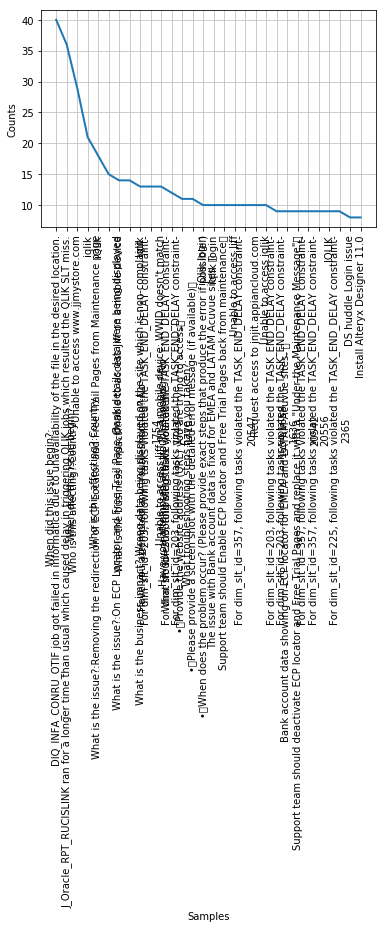

In [33]:
count = nltk.FreqDist(data.Description.values)
count.plot(30)

In [36]:
final_doc = data['Description']
all_documents = tuple(final_doc)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(all_documents)
print (tfidf_matrix.shape)
print(tfidf_matrix)

(29239, 53377)
  (0, 48977)	0.5618743294326463
  (0, 30070)	0.3090704917470208
  (0, 44559)	0.24186789544011186
  (0, 52711)	0.1277174065935419
  (0, 44198)	0.25324798382041364
  (0, 52810)	0.17421708301803615
  (0, 38376)	0.647668681456686
  (1, 52810)	0.19358374309702978
  (1, 36403)	0.2723072078884552
  (1, 33342)	0.18169589388748966
  (1, 19813)	0.2881747203242772
  (1, 33345)	0.19781746799797503
  (1, 7340)	0.4571937644719277
  (1, 35766)	0.303245243650721
  (1, 49592)	0.10528509354614628
  (1, 35981)	0.18726749009324783
  (1, 35959)	0.24979593810446385
  (1, 25009)	0.5689010550831536
  (2, 36403)	0.10112241714360008
  (2, 33342)	0.13494705569818297
  (2, 19813)	0.21402976810521157
  (2, 33345)	0.14692068324079113
  (2, 36392)	0.13521393416245645
  (2, 50363)	0.1504213063813408
  (2, 52141)	0.1392987940610721
  :	:
  (29237, 29191)	0.2839103312087499
  (29237, 30724)	0.2822367322842236
  (29237, 33284)	0.2881078253475096
  (29237, 39135)	0.2839103312087499
  (29237, 32434)	0.37219

In [38]:
reindexed_data= data["Description"]

data_text = data[['Description']]
data_text['index'] = data_text.index
documents=data_text


print(len(documents))
print(documents[:5])

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

29239
                                         Description  index
0  SIMS  blank page when open with IE\r\n??IE ??S...      0
1  For dim_slt_id=203, dim_task_id=1658 exited wi...      1
2  For DIM_SLT_ID=203, following task(s) violated...      2
4                            > DS huddle Login issue      4
6  When did this issue begin?:2018-09-28\n\nWho i...      6


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [39]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmer.stem('identified')


doc_sample = documents[documents['index'] == 12].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))


processed_docs = documents['Description'].map(preprocess)
processed_docs[:5]

original document: 
['For', 'DIM_SLT_ID=203,', 'following', 'task(s)', 'violated', 'the', 'TASK_END_DELAY', 'constraint-\n\nDIM_TASK_ID:', '1785\nTASK_NAME:', 's_m_MENTOR_INT_MNT_PROD_CUST_CONSIG\nSTART_TIME:', '2019-08-24', '08:24:00', 'UTC\nEND_TIME:', '2019-08-24', '08:25:00', 'UTC\n']


 tokenized and lemmatized document: 
['dim_slt_id', 'follow', 'task', 'violat', 'task_end_delay', 'constraint', 'dim_task_id', 'task_nam', 'start_tim', 'end_tim']


0                        [sim, blank, page, open, sim]
1    [dim_slt_id, dim_task_id, exit, statu, fail, f...
2    [dim_slt_id, follow, task, violat, task_end_de...
4                                 [huddl, login, issu]
6    [issu, begin, affect, sale, forc, issu, correc...
Name: Description, dtype: object

## LDA with Gensim:

### Create a dictionary from the data, then convert to bag-of-words corpus and save the dictionary and corpus for future use.

In [41]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 blank
1 open
2 page
3 sim
4 dim_slt_id
5 dim_task_id
6 exit
7 fact_run_id
8 fail
9 statu
10 constraint


In [42]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[123]

[(3, 1), (42, 2), (50, 1), (62, 1), (172, 1), (191, 1), (213, 1), (353, 1)]

In [43]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_123 = bow_corpus[123]
for i in range(len(bow_doc_123)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_123[i][0], 
                                               dictionary[bow_doc_123[i][0]], 
bow_doc_123[i][1]))

Word 3 ("sim") appears 1 time.
Word 42 ("access") appears 2 time.
Word 50 ("error") appears 1 time.
Word 62 ("unabl") appears 1 time.
Word 172 ("attach") appears 1 time.
Word 191 ("get") appears 1 time.
Word 213 ("abl") appears 1 time.
Word 353 ("yesterday") appears 1 time.


In [44]:
#TF-IDF
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.436387232425874),
 (1, 0.32650974629601476),
 (2, 0.3065794432680233),
 (3, 0.7803631295203964)]


### Finding out 5 topics using LDA

In [45]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [46]:
# Print the results
import pickle

# Here we can assign topic names to each topic list, you can specify the number of words you want to have shown (e.g num_words = 5)
result = lda_model.print_topics(num_topics=5, num_words=5)
print(result)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[(0, '0.065*"null" + 0.041*"end" + 0.036*"indic" + 0.034*"itsusralsp" + 0.028*"applic"'), (1, '0.032*"access" + 0.021*"unabl" + 0.021*"applic" + 0.018*"null" + 0.016*"iqlik"'), (2, '0.043*"indic" + 0.042*"end" + 0.028*"manag" + 0.028*"applic" + 0.028*"alert"'), (3, '0.043*"indic" + 0.042*"end" + 0.039*"itsusralsp" + 0.029*"manag" + 0.029*"null"'), (4, '0.041*"troubleshoot" + 0.023*"busi" + 0.022*"step" + 0.021*"affect" + 0.021*"take"')]
Topic: 0 
Words: 0.065*"null" + 0.041*"end" + 0.036*"indic" + 0.034*"itsusralsp" + 0.028*"applic" + 0.025*"alert" + 0.024*"manag" + 0.019*"sim" + 0.017*"order" + 0.015*"node"
Topic: 1 
Words: 0.032*"access" + 0.021*"unabl" + 0.021*"applic" + 0.018*"null" + 0.016*"iqlik" + 0.015*"product" + 0.015*"sale" + 0.014*"jira" + 0.014*"tableau" + 0.012*"custom"
Topic: 2 
Words: 0.043*"indic" + 0.042*"end" + 0.028*"manag" + 0.028*"applic" + 0.028*"alert" + 0.028*"null" + 0.019*"prod" + 0.017*"itsusralsp" + 0.015*"data" + 0.015*"servic"
Topic: 3 
Words: 0.043*"indi

In [47]:
# put these in a file and name the topics
with open("lda_topics_result.txt", "w") as f:
    for s in result:
        f.write(str(s) +"\n")

### pyLDAvis help to interpret the topics in a topic model that has been fit to a corpus of text data

In [57]:
# Visualize
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [50]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda_model.show_topic(i,25)) for i in range(5)}

In [51]:
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(87, 5)
(5, 87)


In [52]:
df_lda

,access,address,affect,alert,alertgroup,alertprior,applic,apptech,aspac,attempt,...,tableau,take,task,task_nam,technolog,time,troubleshoot,unabl,violat,workload
0,0.000000,0.000000,0.000000,0.025316,0.000000,0.014244,0.027677,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.014932,0.000000,0.000000,0.000000,0.015198
1,0.032167,0.000000,0.000000,0.000000,0.000000,0.000000,0.020566,0.000000,0.008614,0.000000,...,0.01396,0.000000,0.000000,0.000000,0.000000,0.000000,0.009217,0.021395,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.027738,0.000000,0.000000,0.028080,0.014212,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.014096,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.014497,0.000000,0.028597,0.014499,0.000000,0.028660,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.012981,0.000000,0.021305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020774,...,0.00000,0.020905,0.009197,0.019711,0.000000,0.000000,0.041181,0.006690,0.008133,0.000000


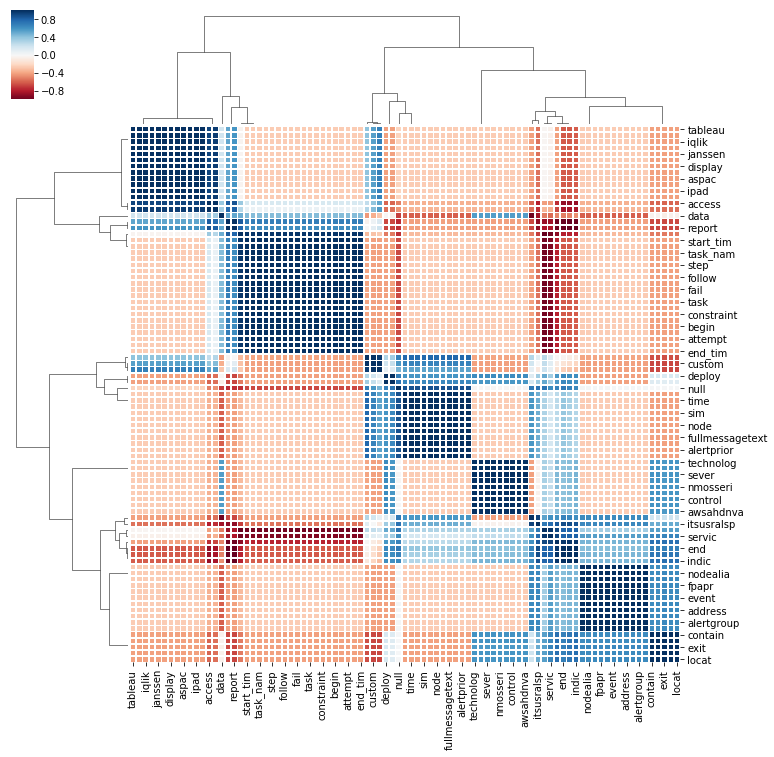

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [54]:
MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.Description.values)
post_seq = tokenizer.texts_to_sequences(data.Description.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [55]:
def data_set_split (y):
    X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.30,random_state=42)
    return X_train, X_test, y_train, y_test

In [56]:

vocab_size = len(tokenizer.word_index) + 1

## Deep Learning Model Simple

In [68]:
from sklearn.externals import joblib

In [69]:
def model_training(num_class, model_file):    
    inputs = Input(shape=(MAX_LENGTH, ))
    embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
    x = Flatten()(embedding_layer)
    x = Dense(32, activation='relu')(x)
    predictions = Dense(num_class, activation='softmax')(x)
    model = Model(inputs=[inputs], outputs=predictions)
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
    model.summary()
    checkpointer = ModelCheckpoint(model_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    history = model.fit([X_train], batch_size=124, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])
    
    df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
    g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
    g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')
    
    return model

### Training Model to predict Knowledge Article that could help to resolved the ticket

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 128)          6758400   
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2048032   
_________________________________________________________________
dense_2 (Dense)              (None, 6889)              227337    
Total params: 9,033,769
Trainable params: 9,033,769
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 208

['model-simple_KCS.pkl']

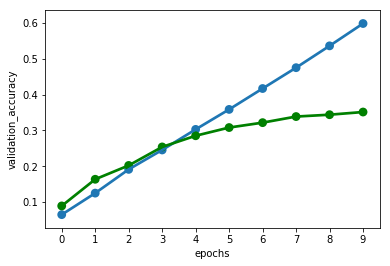

In [70]:
X_train, X_test, y_train, y_test = data_set_split(y_KCS)

model_file = 'weights-simple_KCS.hdf5'
model = model_training(num_class_KCS, model_file)
joblib.dump(model,'model-simple_KCS.pkl')

In [71]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.3707250341997264

In [72]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import itertools

In [74]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
#This should be adjusted to the Predictor
#encoder.fit(data.Resolution_category.values)
encoder.fit(data.KCS_solution.values)
text_labels = encoder.classes_ 


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


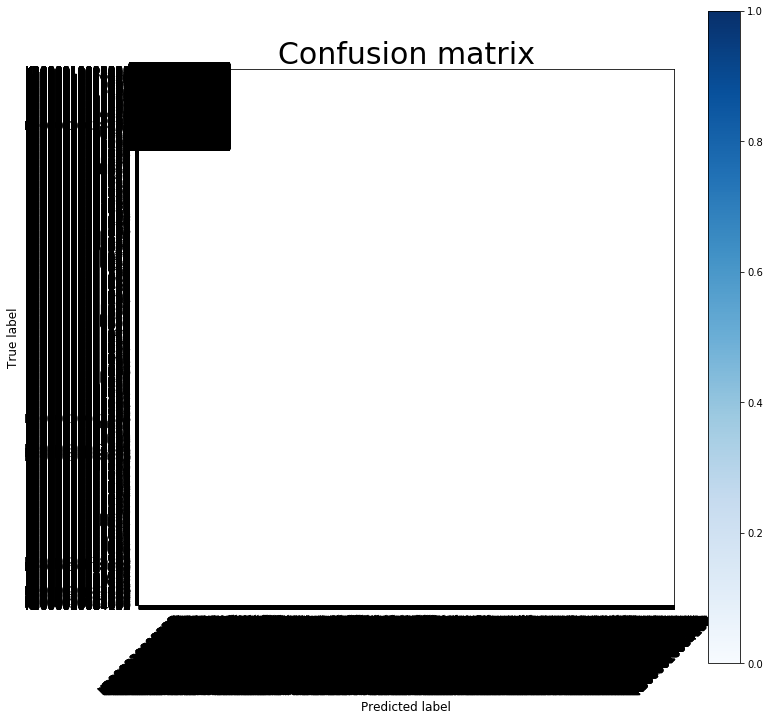

In [75]:
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

## RNN with LSTM Layer

In [76]:
def lstm_model_training(num_class, model_file): 
    inputs = Input(shape=(MAX_LENGTH, ))
    embedding_layer = Embedding(vocab_size,
                                128,
                                input_length=MAX_LENGTH)(inputs)
    x = LSTM(64)(embedding_layer)
    x = Dense(32, activation='relu')(x)
    predictions = Dense(num_class, activation='softmax')(x)
    model_lstm = Model(inputs=[inputs], outputs=predictions)
    model_lstm.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['acc'])
    model_lstm.summary()

    checkpointer = ModelCheckpoint(model_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    history = model_lstm.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
                             shuffle=True, epochs=15, callbacks=[checkpointer])
    
    df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
    g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
    g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')
    return model_lstm


### Training Predictor for Knowledge Article using LSTM RNN 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 500, 128)          6758400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 6889)              227337    
Total params: 7,037,225
Trainable params: 7,037,225
Non-trainable params: 0
_________________________________________________________________
Train on 20832 samples, validate on 6945 samples
Epoch 1/20
20832/20832 [==============================] - 138s 7ms/step - loss: 7.4

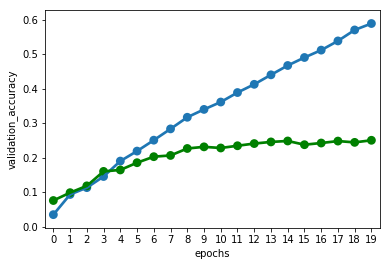

In [78]:
X_train, X_test, y_train, y_test = data_set_split(y_KCS)
model_lstm = lstm_model_training(num_class_KCS,"weights_KCS.hdf5")
joblib.dump(model_lstm,'model_KCS.pkl')
predicted = model_lstm.predict(X_test)

In [ ]:
predicted
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

In [ ]:
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))